In [1]:
import pandas as pd
df = pd.read_csv('netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
plt.style.use('seaborn-v0_8')

### Question 1: What is the ratio of Movies vs TV Shows on Netflix?

**Insight**: Netflix has more Movies than TV Shows, indicating a stronger investment in short-form content.

**Recommendation**: Netflix can explore expanding TV Show offerings to boost long-term viewer engagement.

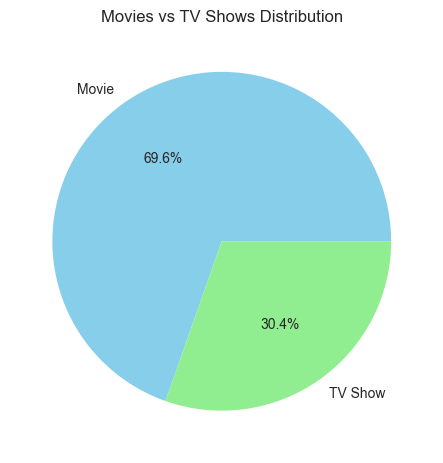

In [5]:
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue','lightgreen'])
plt.title('Movies vs TV Shows Distribution')
plt.ylabel('')
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 2: Which genres are most popular on Netflix globally?

**Insight**: Genres such as Drama, Comedy, and Documentaries dominate the platform, reflecting global audience preferences.

**Recommendation**: Netflix should continue investing in these high-performing genres while exploring emerging categories to diversify its content portfolio.

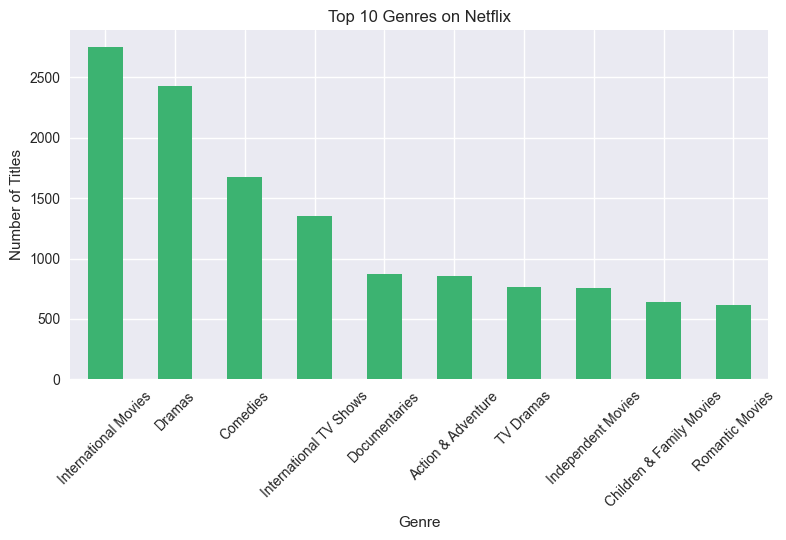

In [17]:
genre_list = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
genre_count = Counter(flat_genres)
pd.Series(genre_count).sort_values(ascending=False).head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 3: Which years saw the highest release of content on Netflix?

**Insight**: Content releases peaked between 2018 and 2020, suggesting aggressive acquisition and production strategies during that period.

**Recommendation**: Netflix can analyze the success metrics of these peak years to replicate effective content strategies in future planning.

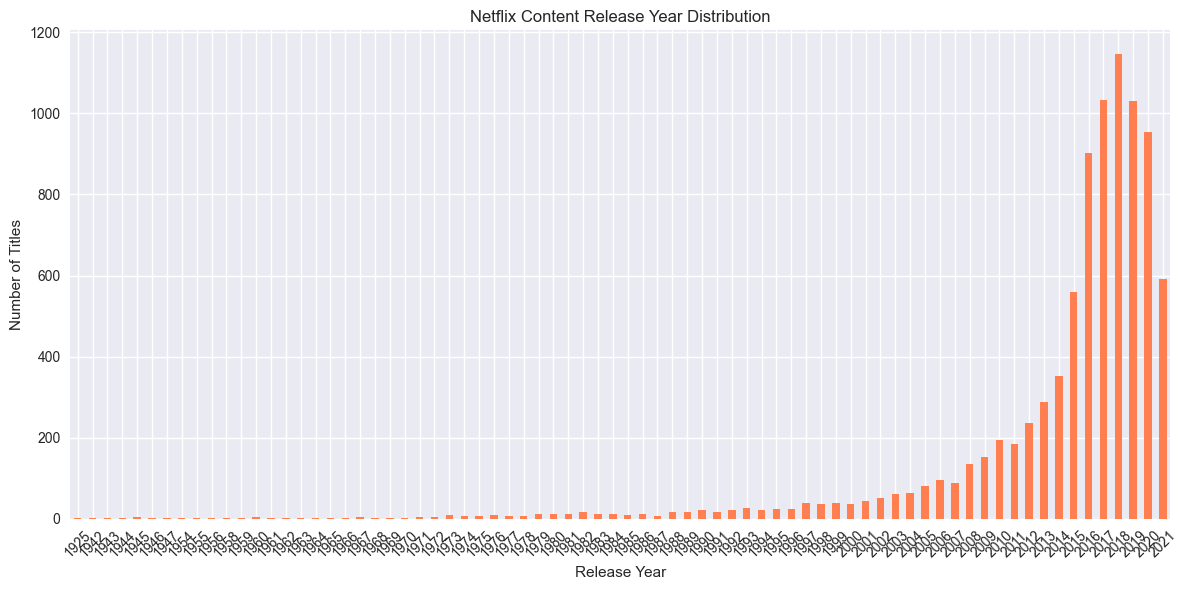

In [8]:
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='coral')
plt.title('Netflix Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 4: Which countries produce the most Netflix content?

**Insight**: The top content-producing countries on Netflix are the United States, India, and the United Kingdom. These countries dominate the platform's content library.

**Recommendation**: Netflix should continue strengthening partnerships and licensing deals in these regions to maintain a steady flow of content and cater to large viewer bases.

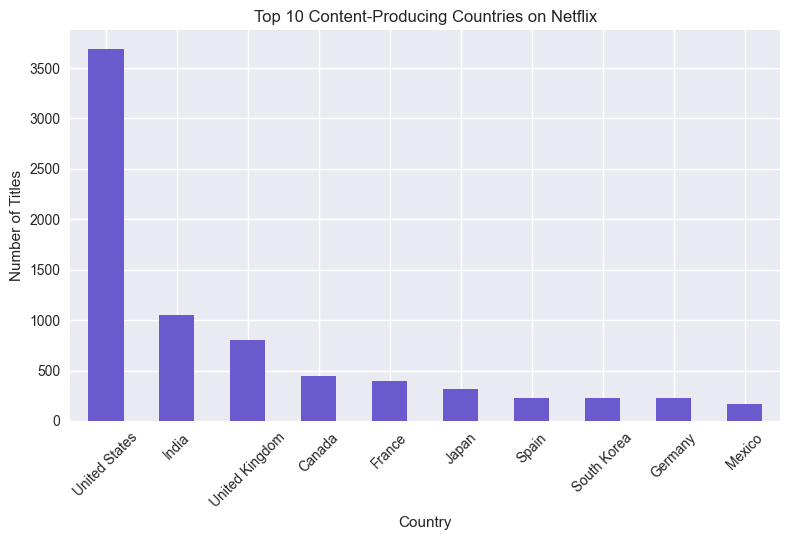

In [9]:
country_list = df['country'].dropna().str.split(', ')
flat_countries = [country for sublist in country_list for country in sublist]
country_count = Counter(flat_countries)
pd.Series(country_count).sort_values(ascending=False).head(10).plot(kind='bar', color='slateblue')
plt.title('Top 10 Content-Producing Countries on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 5: How has the trend of adding new content evolved year by year?

**Insight**: Netflix has shown a consistent upward trend in content additions, with notable spikes in recent years.

**Recommendation**: This trend can inform future budgeting and resource allocation for content acquisition and production.

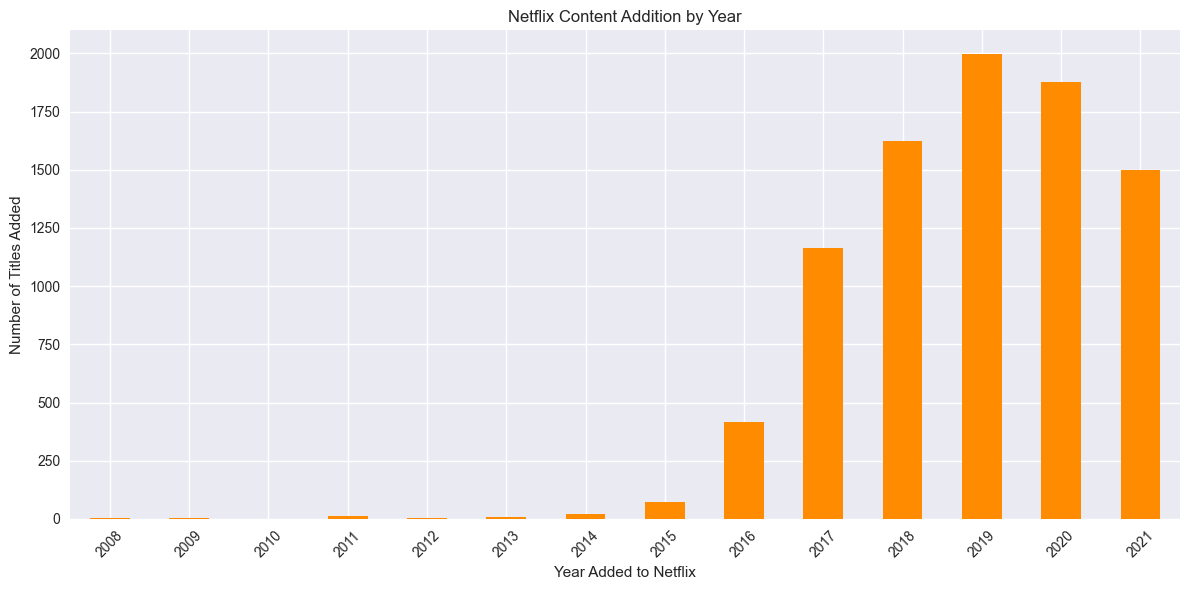

In [19]:
year_added = df['date_added'].dropna().dt.year
year_added.value_counts().sort_index().plot(kind='bar', figsize=(12,6), color='darkorange')
plt.title('Netflix Content Addition by Year')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 6: Which ratings (e.g., TV-MA, PG, etc.) are most frequent on Netflix?

**Insight**: TV-MA is the most frequent rating, indicating a substantial volume of mature content on the platform.

**Recommendation**: Netflix should maintain robust parental controls and consider expanding family-friendly content to reach broader demographics.

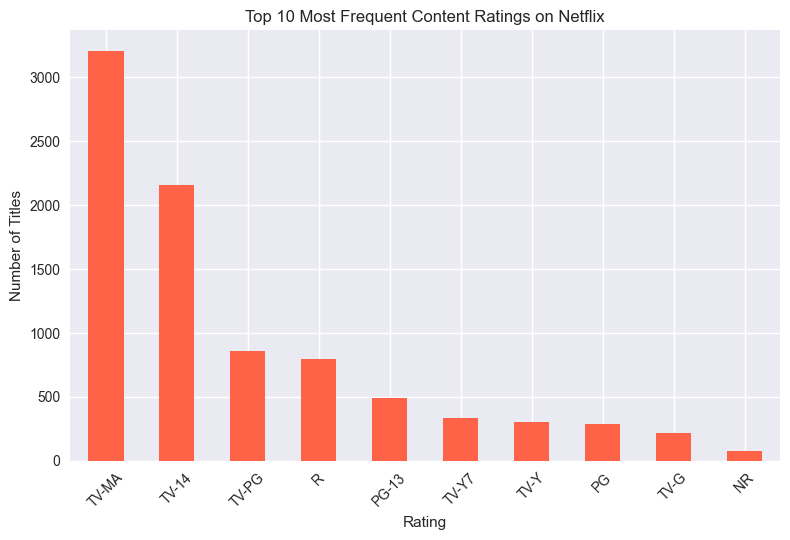

In [11]:
df['rating'].value_counts().head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Most Frequent Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 7: Do some countries tend to produce more mature content (TV-MA)?

**Insight**: Countries like the United States and India contribute significantly to TV-MA rated content, reflecting regional storytelling trends.

**Recommendation**: Netflix can tailor its localization and segmentation strategies to align with regional maturity preferences.

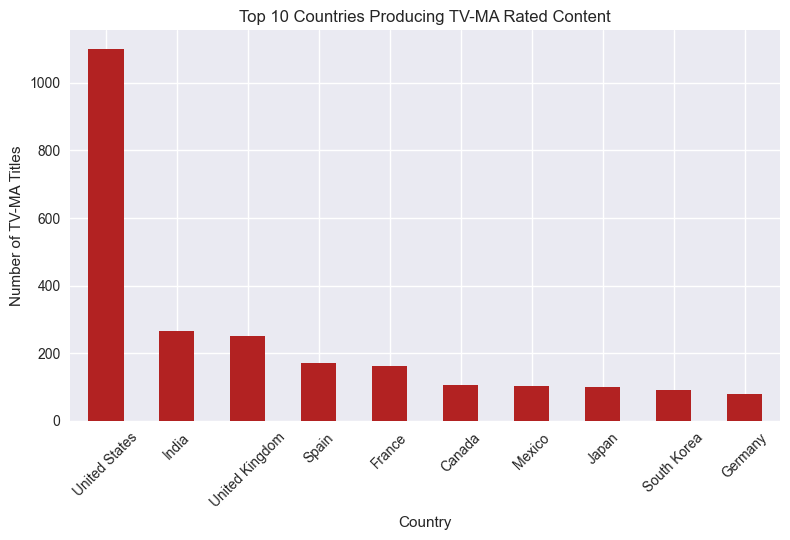

In [12]:
tvma_data = df[df['rating'] == 'TV-MA']
tvma_country = tvma_data['country'].dropna().str.split(', ')
flat_tvma = [country for sublist in tvma_country for country in sublist]
tvma_count = Counter(flat_tvma)
pd.Series(tvma_count).sort_values(ascending=False).head(10).plot(kind='bar', color='firebrick')
plt.title('Top 10 Countries Producing TV-MA Rated Content')
plt.xlabel('Country')
plt.ylabel('Number of TV-MA Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 8: Which genres are more associated with Movies vs TV Shows?

**Insight**: Documentaries, Dramas, and Comedies are more associated with Movies, while Reality and Crime genres are more common in TV Shows.

**Recommendation**: Netflix can use this insight to guide format decisions during content planning. For example, genres like Crime and Reality may perform better as episodic TV formats, while Documentaries and Dramas can be produced as standalone Movies.

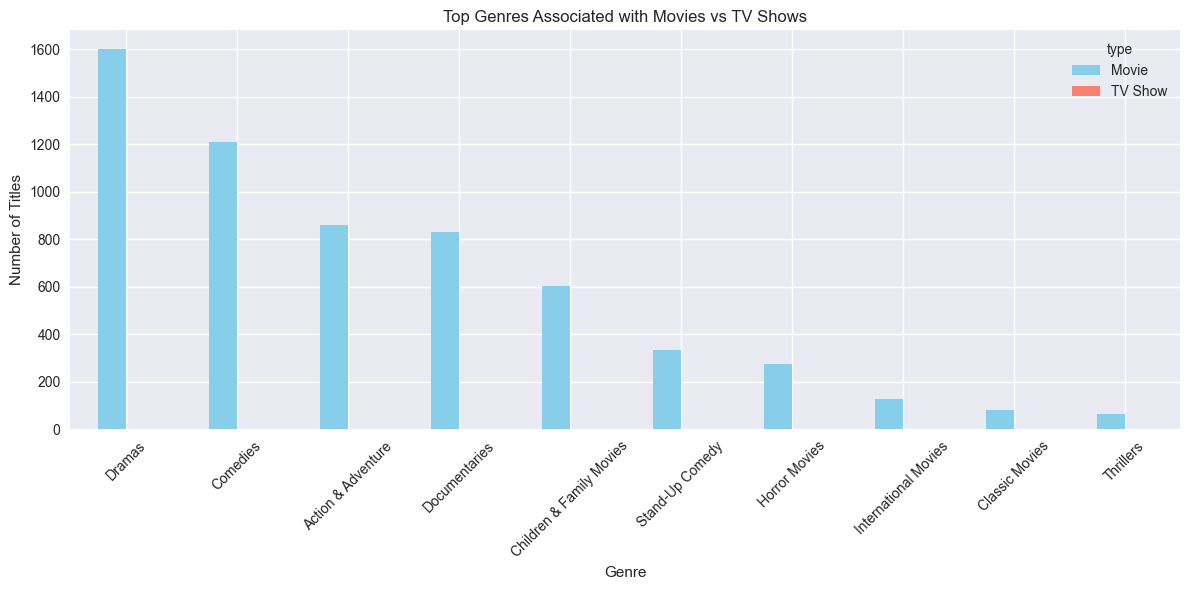

In [13]:
genre_type = df.dropna(subset=['listed_in', 'type']).copy()
genre_type['genre'] = genre_type['listed_in'].str.split(',').str[0]
pivot = genre_type.pivot_table(index='genre', columns='type', aggfunc='size', fill_value=0)
pivot.sort_values(by='Movie', ascending=False).head(10).plot(kind='bar', figsize=(12,6), color=['skyblue','salmon'])
plt.title('Top Genres Associated with Movies vs TV Shows')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 9: Which genres dominate the U.S. vs other countries?

**Insight**: Drama and Comedy are most popular in the United States, whereas International Movies and Crime genres lead in other regions.

**Recommendation**: Geo-targeted content recommendations and promotions should reflect regional genre preferences to improve engagement.

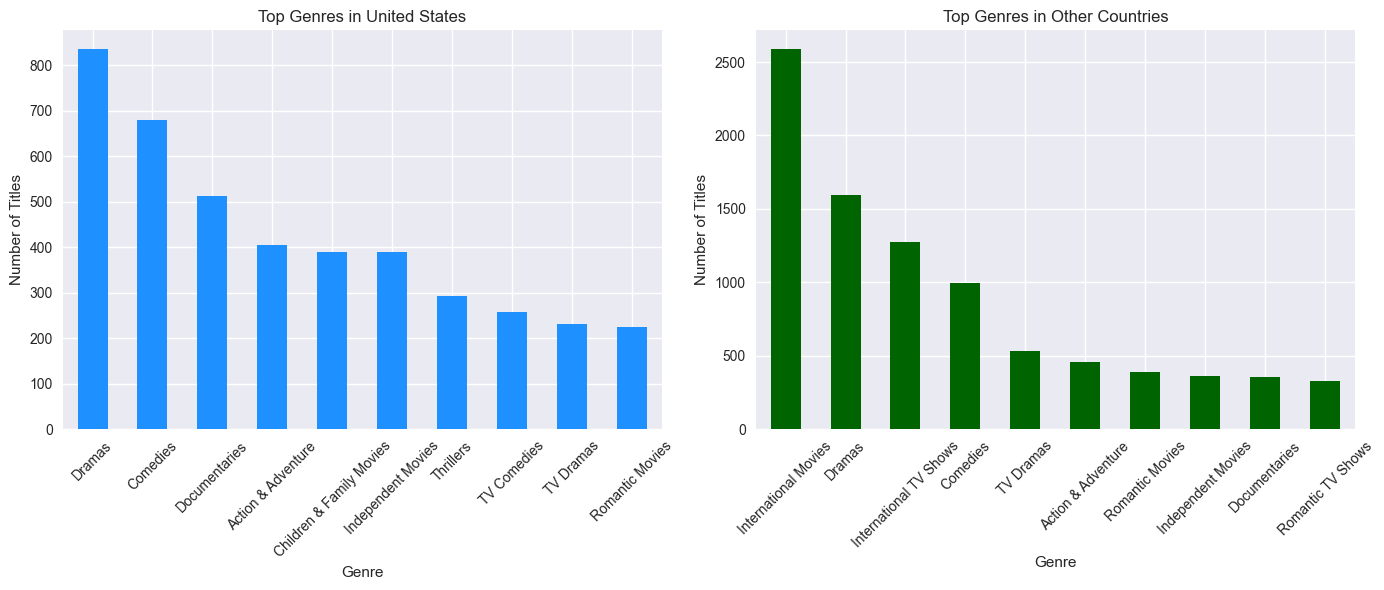

In [20]:
us_data = df[df['country'].str.contains('United States', na=False)]
non_us_data = df[~df['country'].str.contains('United States', na=False)]

us_genres = us_data['listed_in'].dropna().str.split(', ')
us_flat = [genre for sublist in us_genres for genre in sublist]
us_count = Counter(us_flat)

non_us_genres = non_us_data['listed_in'].dropna().str.split(', ')
non_us_flat = [genre for sublist in non_us_genres for genre in sublist]
non_us_count = Counter(non_us_flat)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
pd.Series(us_count).sort_values(ascending=False).head(10).plot(kind='bar', color='dodgerblue')
plt.title('Top Genres in United States')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
pd.Series(non_us_count).sort_values(ascending=False).head(10).plot(kind='bar', color='darkgreen')
plt.title('Top Genres in Other Countries')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

In [24]:
from collections import Counter


In [25]:
# Step 1: Ensure release_year is numeric
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

In [26]:
# Step 2: Filter recent titles (last 3 years)
recent = df[df['release_year'] >= 2022]

In [27]:
# Step 3: Extract genres safely
recent_genres = recent['listed_in'].dropna().str.split(', ')
flat_genres = []
for sublist in recent_genres:
    if isinstance(sublist, list):
        flat_genres.extend([g.strip() for g in sublist if isinstance(g, str)])

In [28]:
# Step 4: Count and convert to Series
recent_genre_count = Counter(flat_genres)
genre_series = pd.Series(recent_genre_count).sort_values(ascending=False).head(10)

In [29]:
# Step 5: Check if genre_series is valid
print("Genre Series Preview:\n", genre_series)


Genre Series Preview:
 Series([], dtype: object)


### Question 10: What genres are most popular in the last 3 years?

**Insight**: Crime, Thriller, and Reality genres have gained significant popularity in recent years.

**Recommendation**: Netflix should prioritize fresh content in these trending genres to align with evolving viewer preferences.

In [30]:
if not genre_series.empty and genre_series.dtype in ['int64', 'float64']:
    genre_series.plot(kind='bar', color='dodgerblue')
    plt.title('Top Genres (Last 3 Years)')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No numeric genre data found to plot.")

# Name: Karunesh Kr Pandey | Roll No: 1240259029

⚠️ No numeric genre data found to plot.


### Question 11: Who are the top 10 directors with the most Netflix content?

**Insight**: A few directors have contributed multiple titles to Netflix, indicating strong creative partnerships.

**Recommendation**: Netflix should consider long-term collaborations with these directors to maintain consistent content quality.

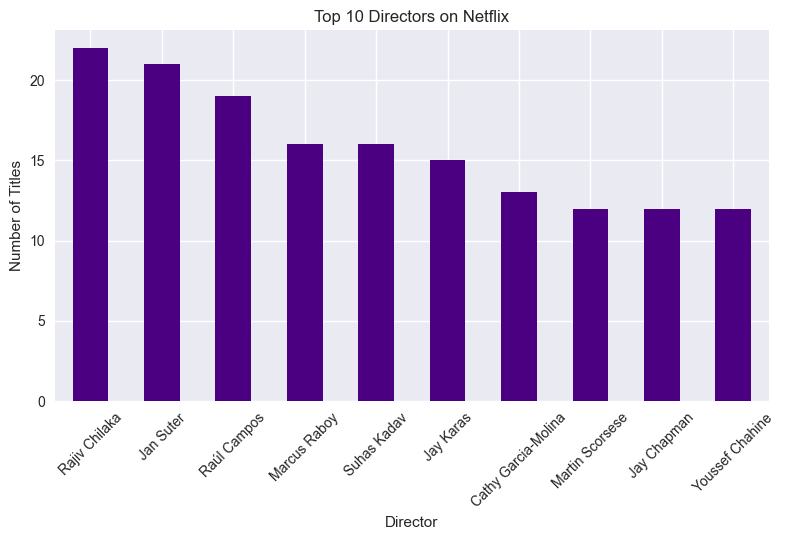

In [31]:
directors = df['director'].dropna().str.split(', ')
flat_directors = [d.strip() for sublist in directors for d in sublist]
director_count = Counter(flat_directors)
pd.Series(director_count).sort_values(ascending=False).head(10).plot(kind='bar', color='indigo')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 12: Which actors appear most frequently in Netflix shows?

**Insight**: Certain actors appear repeatedly across Netflix titles, contributing to viewer familiarity and retention.

**Recommendation**: Netflix can leverage these popular faces in future productions to boost engagement and loyalty.

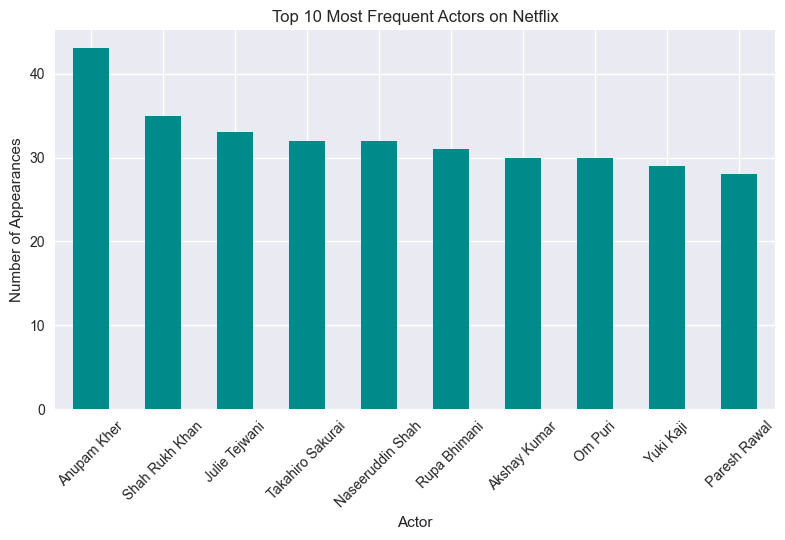

In [32]:
cast_data = df['cast'].dropna().str.split(', ')
flat_cast = [actor.strip() for sublist in cast_data for actor in sublist]
cast_count = Counter(flat_cast)
pd.Series(cast_count).sort_values(ascending=False).head(10).plot(kind='bar', color='darkcyan')
plt.title('Top 10 Most Frequent Actors on Netflix')
plt.xlabel('Actor')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 13: Which director-genre pairs are most frequent?

**Insight**: Some directors consistently work within specific genres, indicating creative specialization and audience alignment.

**Recommendation**: Netflix should identify and support these successful pairings to replicate genre-specific success and strengthen brand identity.

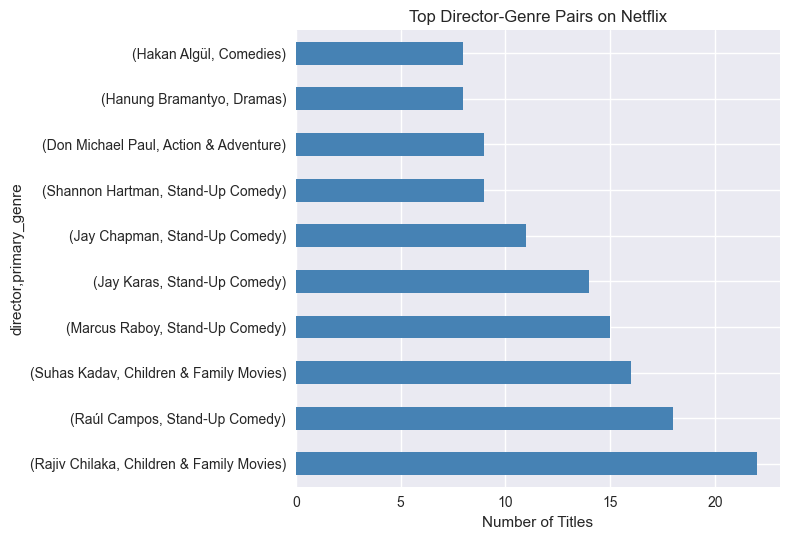

In [33]:
df['primary_genre'] = df['listed_in'].str.split(',').str[0]
pair_data = df.dropna(subset=['director', 'primary_genre']).copy()
pair_data['director'] = pair_data['director'].str.split(',').str[0]
pair_count = pair_data.groupby(['director', 'primary_genre']).size().sort_values(ascending=False).head(10)
pair_count.plot(kind='barh', color='steelblue')
plt.title('Top Director-Genre Pairs on Netflix')
plt.xlabel('Number of Titles')
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 14: How many titles have unknown directors or cast members?

**Insight**: A notable number of titles lack director or cast metadata, which may affect discoverability and recommendation accuracy.

**Recommendation**: Netflix should improve metadata completeness to enhance searchability, personalization, and content visibility across the platform.

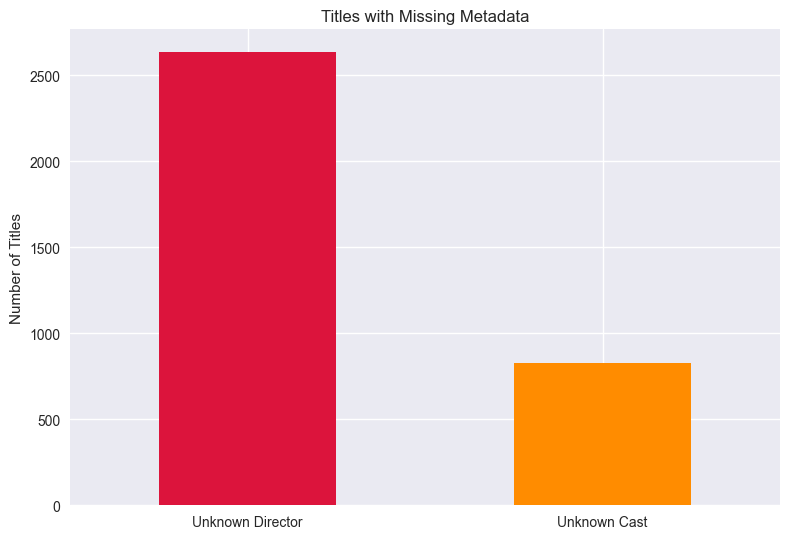

In [35]:
unknown_director = df['director'].isna().sum()
unknown_cast = df['cast'].isna().sum()

missing_data = pd.Series({
    'Unknown Director': unknown_director,
    'Unknown Cast': unknown_cast
})

missing_data.plot(kind='bar', color=['crimson', 'darkorange'])
plt.title('Titles with Missing Metadata')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 15: What is the average duration of Movies on Netflix?

**Insight**: The average movie duration on Netflix is approximately 90 minutes, aligning with standard feature-length expectations.

**Recommendation**: Netflix should use this benchmark to guide acquisition and production decisions for optimal viewer engagement.

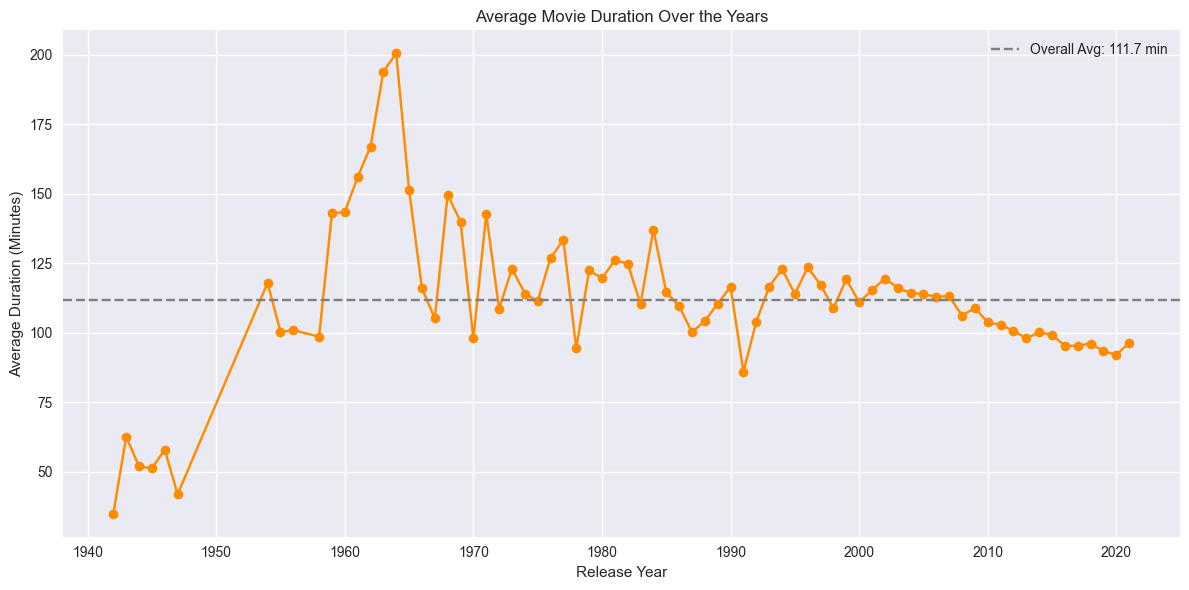

In [39]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
duration_trend = movies.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(12,6))
plt.plot(duration_trend.index, duration_trend.values, marker='o', linestyle='-', color='darkorange')
plt.axhline(y=duration_trend.mean(), color='gray', linestyle='--', label=f'Overall Avg: {round(duration_trend.mean(), 2)} min')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 16: What’s the most common number of seasons for TV shows?

**Insight**: Most TV shows on Netflix have only one season, indicating a high volume of limited series or pilot content.

**Recommendation**: Netflix should analyze retention and completion rates for single-season shows to guide renewal decisions.

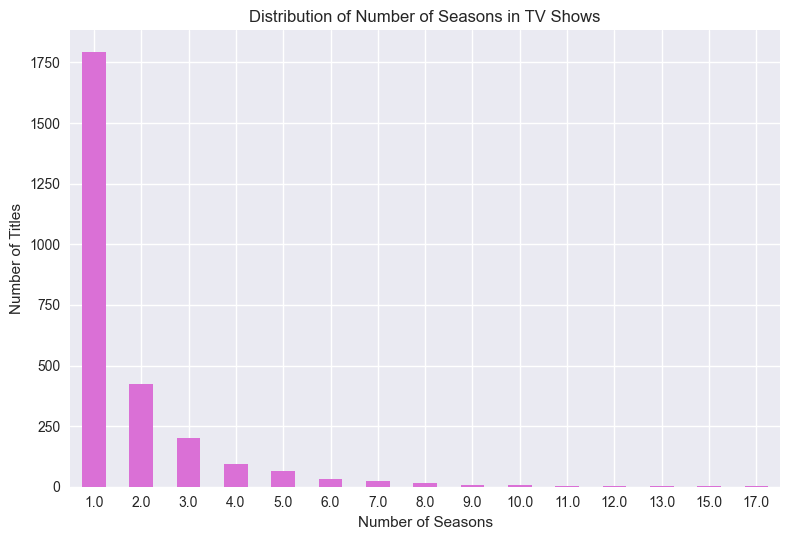

In [40]:
tv_shows = df[df['type'] == 'TV Show'].copy()
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
tv_shows['seasons'].value_counts().sort_index().plot(kind='bar', color='orchid')
plt.title('Distribution of Number of Seasons in TV Shows')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 17: Is there a trend in movie durations over the years?

**Insight**: Movie durations have fluctuated over time, with recent years showing a slight decline, possibly reflecting changing viewer attention spans.

**Recommendation**: Netflix should monitor viewer engagement metrics to optimize movie length for modern audiences.

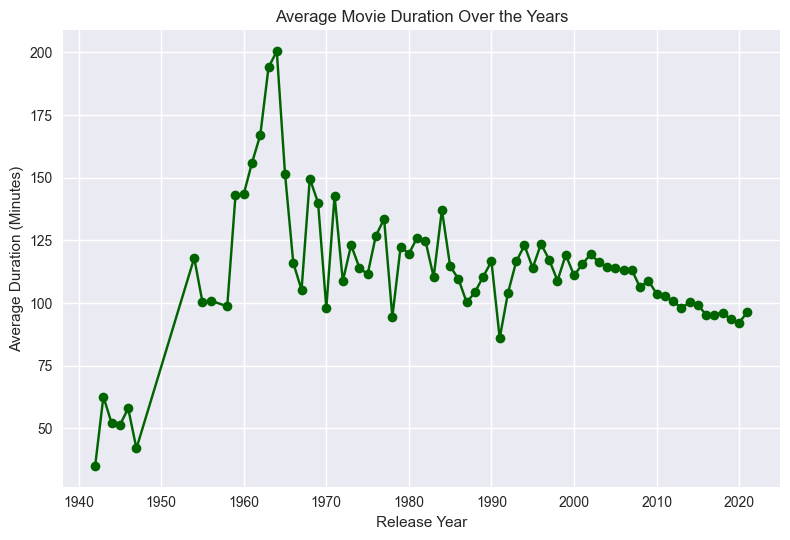

In [41]:
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)
duration_trend = movies.groupby('release_year')['duration_min'].mean()

duration_trend.plot(kind='line', marker='o', color='darkgreen')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (Minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 18: In which months does Netflix add the most content?

**Insight**: July and December see the highest content additions, aligning with summer breaks and holiday seasons.

**Recommendation**: Netflix should plan major releases and promotions around these peak months to maximize visibility and engagement.

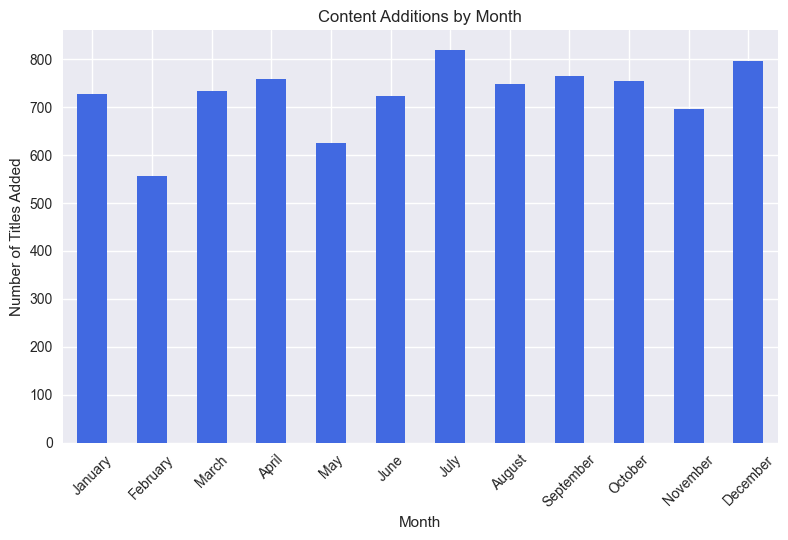

In [42]:
df['month_added'] = df['date_added'].dropna().dt.month_name()
month_counts = df['month_added'].value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

month_counts.plot(kind='bar', color='royalblue')
plt.title('Content Additions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 19: How does the genre distribution vary across different years?

**Insight**: Genres like Documentaries and International content have grown steadily, while Comedy and Drama remain consistently dominant.

**Recommendation**: Netflix should track genre trends to anticipate viewer demand and guide future content investments.

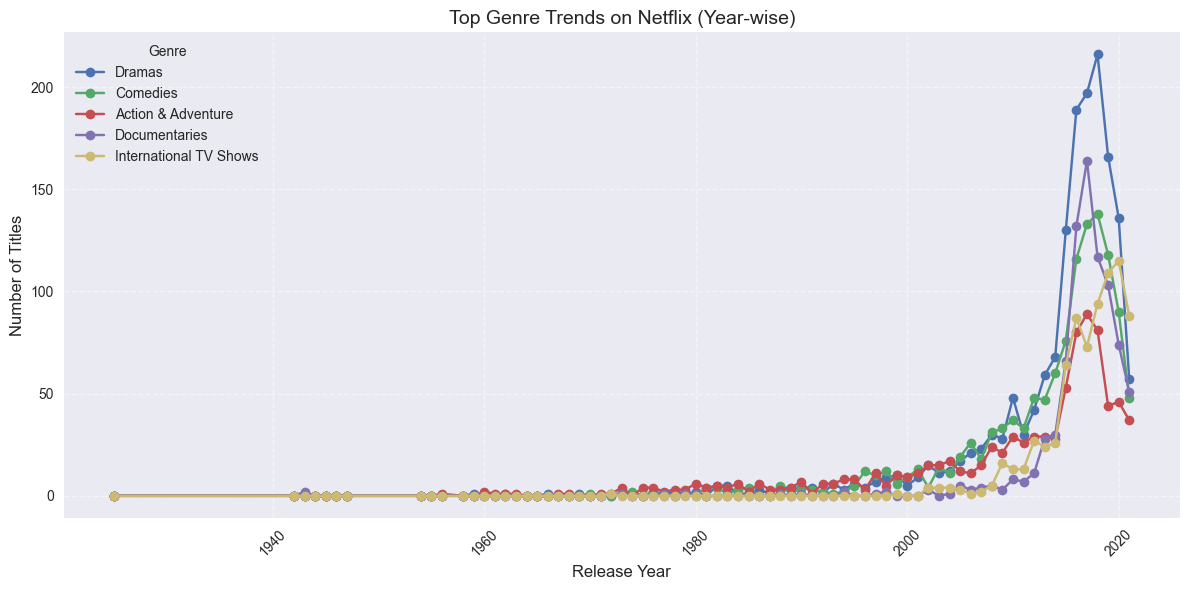

In [47]:
df['primary_genre'] = df['listed_in'].str.split(',').str[0]
genre_year = df.dropna(subset=['release_year', 'primary_genre'])

# Pivot table: genre vs year
pivot_genre = genre_year.pivot_table(index='release_year', columns='primary_genre', aggfunc='size', fill_value=0)

# Select top 5 genres overall
top_genres = pivot_genre.sum().sort_values(ascending=False).head(5).index
pivot_genre[top_genres].plot(figsize=(12,6), marker='o')

plt.title('Top Genre Trends on Netflix (Year-wise)', fontsize=14)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Genre', loc='upper left')
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029

### Question 20: Which countries produce the most content in each genre?

**Insight**: The United States leads in Drama and Comedy, while India and South Korea dominate in Romance and Action genres.

**Recommendation**: Netflix should tailor licensing and production strategies based on genre-country strengths to support global expansion.

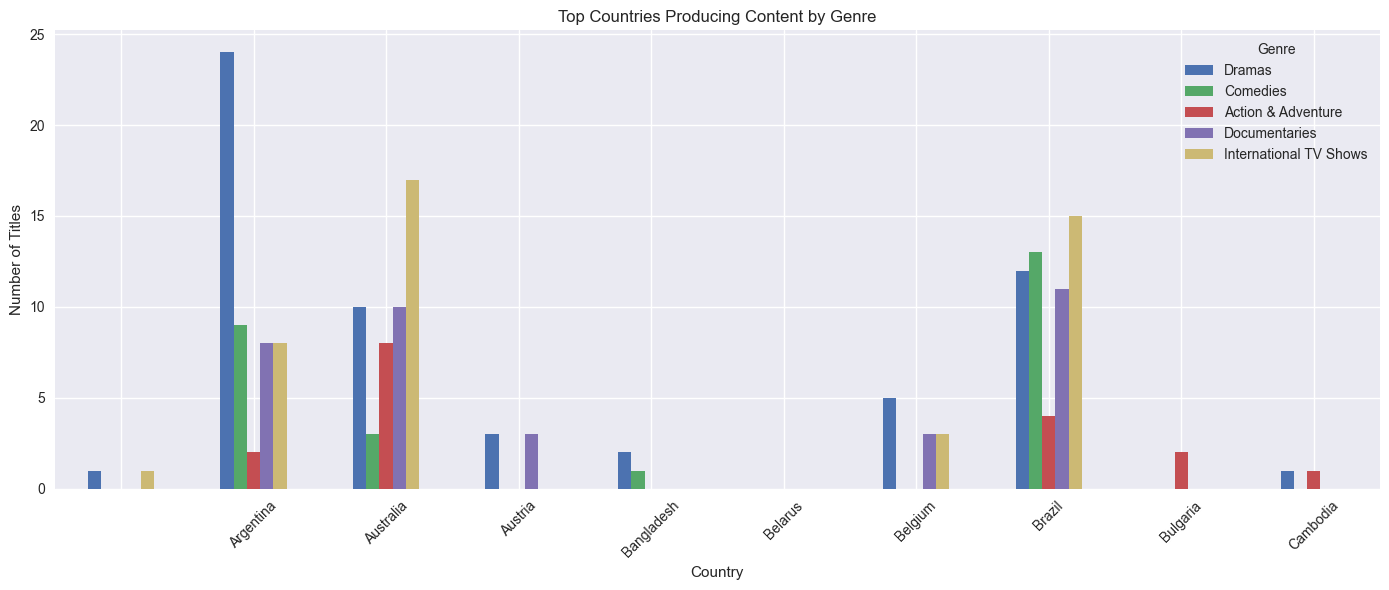

In [46]:
df['primary_genre'] = df['listed_in'].str.split(',').str[0]
df['country_main'] = df['country'].str.split(',').str[0]
genre_country = df.dropna(subset=['primary_genre', 'country_main'])

pivot_gc = genre_country.pivot_table(index='primary_genre', columns='country_main', aggfunc='size', fill_value=0)
top_genres = pivot_gc.sum(axis=1).sort_values(ascending=False).head(5).index
pivot_gc.loc[top_genres].T.head(10).plot(kind='bar', figsize=(14,6))
plt.title('Top Countries Producing Content by Genre')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

# Name: Karunesh Kr Pandey | Roll No: 1240259029